# Exploratory Data Analysis of Industrial Energy End Use in the U.S

*Importing Libraries*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Reading File*

In [5]:
df=pd.read_csv('industrialcombenergy-2014-csv-1.csv',encoding='unicode_escape')

In [ ]:
df.info()

In [ ]:
df.columns

*Data Cleaning*

In [ ]:
df.shape

In [8]:
df.drop(['FUEL_TYPE_BLEND','FUEL_TYPE_OTHER'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
pd.isnull(df)


In [ ]:
pd.isnull(df).sum()

# What is the distribution of FUEL_TYPE across the dataset?

In [ ]:
ax=sns.countplot(x='FUEL_TYPE',data=df,hue='FUEL_TYPE')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

*for top 10 Fuel Types*

In [ ]:
top_10_fuel_types = df['FUEL_TYPE'].value_counts().head(10).index
ax = sns.countplot(x='FUEL_TYPE', data=df[df['FUEL_TYPE'].isin(top_10_fuel_types)], hue='FUEL_TYPE')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()


*Top 10 in Decending Order*

In [ ]:

top_10_fuel_types = df['FUEL_TYPE'].value_counts().head(8)

filtered_df = df[df['FUEL_TYPE'].isin(top_10_fuel_types.index)]


filtered_df['FUEL_TYPE'] = pd.Categorical(
    filtered_df['FUEL_TYPE'], 
    categories=top_10_fuel_types.index, 
    ordered=True
)


ax = sns.countplot(x='FUEL_TYPE', data=filtered_df, hue='FUEL_TYPE', order=top_10_fuel_types.index)


for bars in ax.containers:
    ax.bar_label(bars)


plt.xticks(rotation=90)
plt.show()


# 2. Which Column has most Missing Values

df.isnull().sum()

*we deleted FUEL_TYPE_BLEND and FUEL_TYPE_OTHER which are completely null*

 # What are the most frequent FACILITY_NAME and FACILITY_ID entries?

In [ ]:
sns.countplot(x='FACILITY_ID', data=df, hue='FACILITY_ID')

plt.show()

*Many Facility ids to plot so we do top 10*

In [ ]:
top_10_facilities = df['FACILITY_ID'].value_counts().head(10).index
filtered_dff= df[df['FACILITY_ID'].isin(top_10_facilities)]

bx=sns.countplot(x='FACILITY_ID', data=filtered_dff)
for bars in bx.containers:
    bx.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_facilities = df['FACILITY_NAME'].value_counts().head(10).index
filtered_dff= df[df['FACILITY_NAME'].isin(top_10_facilities)]

bx=sns.countplot(x='FACILITY_NAME', data=filtered_dff)
for bars in bx.containers:
    bx.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [9]:
df.columns

Index(['index', 'FACILITY_ID', 'FACILITY_NAME', 'FUEL_TYPE',
       'OTHER_OR_BLEND_FUEL_TYPE', 'REPORTING_YEAR', 'UNIT_NAME', 'UNIT_TYPE',
       'COUNTY', 'COUNTY_FIPS', 'LATITUDE', 'LONGITUDE', 'STATE', 'ZIP',
       'PRIMARY_NAICS_CODE', 'PRIMARY_NAICS_TITLE',
       'COGENERATION_UNIT_EMISS_IND', 'CENSUS_PLACE_NAME', 'MECS_Region',
       'MMBtu_TOTAL', 'GWht_TOTAL', 'GROUPING'],
      dtype='object')

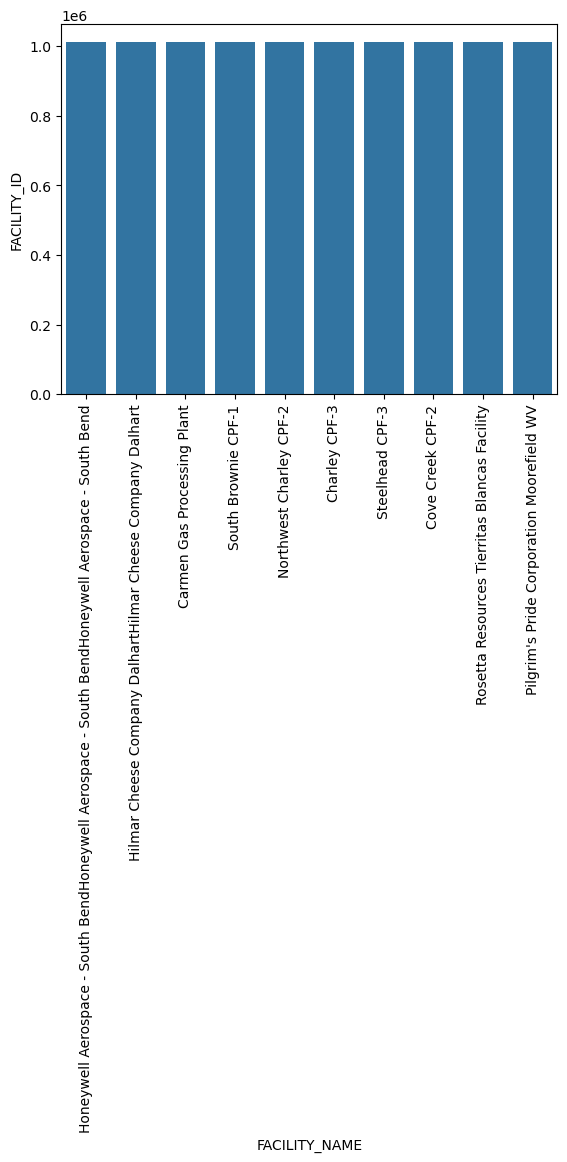

In [7]:
abb = df.groupby(['FACILITY_ID'], as_index=False)['FACILITY_NAME'].sum().sort_values(by='FACILITY_ID', ascending=False)
top_10 = abb.head(10)
sns.barplot(x='FACILITY_NAME', y='FACILITY_ID', data=top_10)
plt.xticks(rotation=90)  
plt.show()


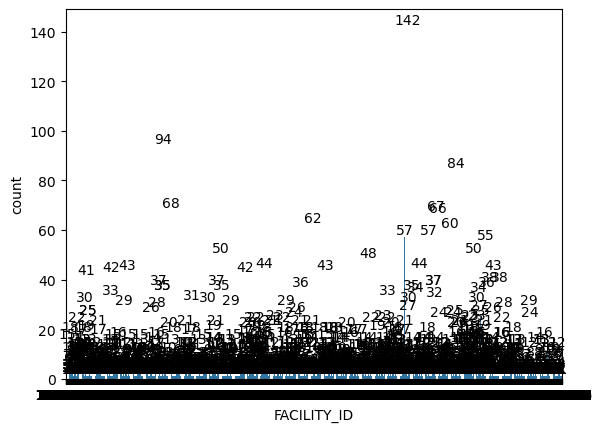

In [11]:
cx=sns.countplot(x='FACILITY_ID',data=df)

for bars in cx.containers:
    cx.bar_label(bars)

plt.show()

*For top 10 Facility IDS*

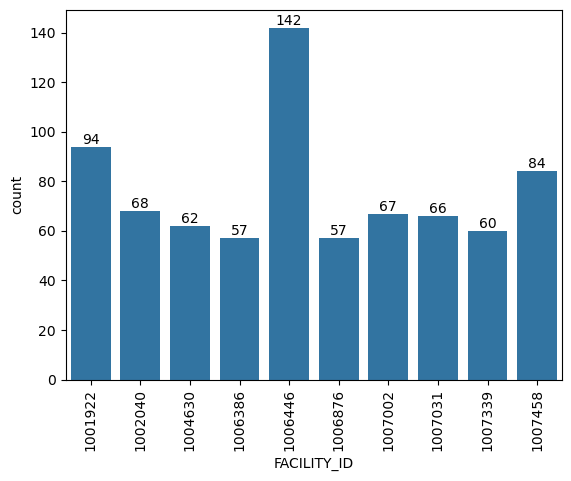

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
top_10_facility_ids = df['FACILITY_ID'].value_counts().head(10).index

filtered_df = df[df['FACILITY_ID'].isin(top_10_facility_ids)]

cx = sns.countplot(x='FACILITY_ID', data=filtered_df)

for bars in cx.containers:
    cx.bar_label(bars)

plt.xticks(rotation=90)
plt.show()


# What are the mean, median, and standard deviation of MMBtu_TOTAL and GWht_TOTAL?

In [19]:
df[['MMBtu_TOTAL','GWht_TOTAL']].describe()

,MMBtu_TOTAL,GWht_TOTAL
count,2.011700e+04,20117.000000
mean,5.254344e+05,153.990589
std,1.588700e+06,465.604893
min,1.000000e+00,0.000293
25%,2.014795e+03,0.590482
50%,4.656615e+04,13.647278
75%,4.679363e+05,137.139461
max,5.309989e+07,15562.141560


# How are MMBtu_TOTAL and GWht_TOTAL correlated?

In [22]:
df[['MMBtu_TOTAL','GWht_TOTAL']].describe()

,MMBtu_TOTAL,GWht_TOTAL
count,2.011700e+04,20117.000000
mean,5.254344e+05,153.990589
std,1.588700e+06,465.604893
min,1.000000e+00,0.000293
25%,2.014795e+03,0.590482
50%,4.656615e+04,13.647278
75%,4.679363e+05,137.139461
max,5.309989e+07,15562.141560


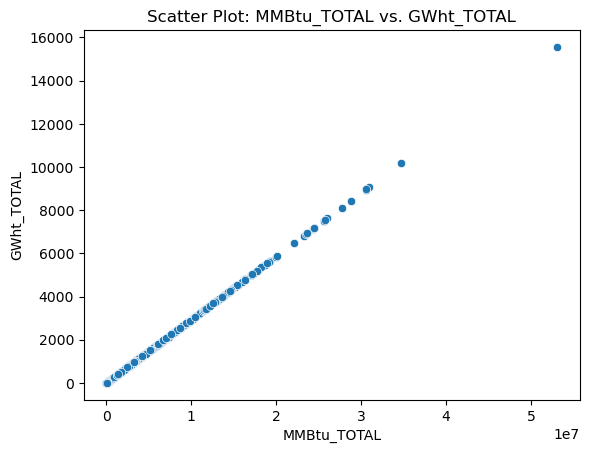

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='MMBtu_TOTAL', y='GWht_TOTAL', data=df)
plt.title('Scatter Plot: MMBtu_TOTAL vs. GWht_TOTAL')
plt.xlabel('MMBtu_TOTAL')
plt.ylabel('GWht_TOTAL')
plt.show()


**y=mx**

# What is the range of LATITUDE and LONGITUDE values? Are there any outliers?

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20117 entries, 0 to 20116
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20117 non-null  int64  
 1   FACILITY_ID                  20117 non-null  int64  
 2   FACILITY_NAME                20117 non-null  object 
 3   FUEL_TYPE                    20117 non-null  object 
 4   OTHER_OR_BLEND_FUEL_TYPE     62 non-null     object 
 5   REPORTING_YEAR               20117 non-null  int64  
 6   UNIT_NAME                    20117 non-null  object 
 7   UNIT_TYPE                    19836 non-null  object 
 8   COUNTY                       19318 non-null  object 
 9   COUNTY_FIPS                  20117 non-null  int64  
 10  LATITUDE                     20057 non-null  float64
 11  LONGITUDE                    20057 non-null  float64
 12  STATE                        20117 non-null  object 
 13  ZIP             

In [32]:
df.isnull().sum()

index                              0
FACILITY_ID                        0
FACILITY_NAME                      0
FUEL_TYPE                          0
OTHER_OR_BLEND_FUEL_TYPE       20055
REPORTING_YEAR                     0
UNIT_NAME                          0
UNIT_TYPE                        281
COUNTY                           799
COUNTY_FIPS                        0
LATITUDE                          60
LONGITUDE                         60
STATE                              0
ZIP                                0
PRIMARY_NAICS_CODE                 0
PRIMARY_NAICS_TITLE                0
COGENERATION_UNIT_EMISS_IND      160
CENSUS_PLACE_NAME              14115
MECS_Region                      923
MMBtu_TOTAL                        0
GWht_TOTAL                         0
GROUPING                           0
dtype: int64

In [34]:
df[['LATITUDE','LONGITUDE']].describe()

,LATITUDE,LONGITUDE
count,20057.000000,20057.000000
mean,37.591472,-92.293891
std,6.685860,16.742720
min,13.463639,-166.551311
25%,32.504129,-97.108580
50%,38.596226,-90.031099
75%,41.670300,-82.250816
max,71.292212,144.807727


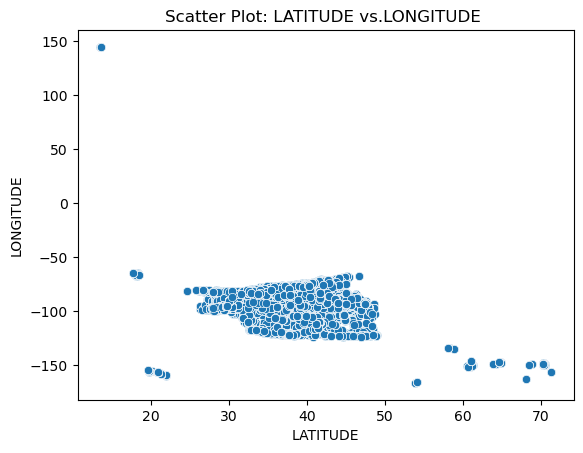

In [36]:

# Scatter plot
sns.scatterplot(x='LATITUDE', y='LONGITUDE', data=df)
plt.title('Scatter Plot: LATITUDE vs.LONGITUDE ')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE')
plt.show()


In [12]:
# Define geographical bounds for valid LATITUDE and LONGITUDE
valid_lat_range = (25, 50)
valid_lon_range = (-125, -50)

# Filter for outliers
outliers = df[
    (df['LATITUDE'] < valid_lat_range[0]) | (df['LATITUDE'] > valid_lat_range[1]) |
    (df['LONGITUDE'] < valid_lon_range[0]) | (df['LONGITUDE'] > valid_lon_range[1])
]

# Print the outliers
print("Outliers in LATITUDE and LONGITUDE:")
print(outliers)


Outliers in LATITUDE and LONGITUDE:
       index  FACILITY_ID                          FACILITY_NAME  \
815      815      1007341            ANCHORAGE REGIONAL LANDFILL   
816      816      1007341            ANCHORAGE REGIONAL LANDFILL   
940      940      1000216                        Kekaha Landfill   
1277    1277      1007083                     Cabo Rojo Landfill   
1278    1278      1007121                      Carolina Landfill   
...      ...          ...                                    ...   
20044  20044      1005265  HAWAIIAN COMMERICAL AND SUGAR COMPANY   
20045  20045      1005265  HAWAIIAN COMMERICAL AND SUGAR COMPANY   
20046  20046      1005265  HAWAIIAN COMMERICAL AND SUGAR COMPANY   
20047  20047      1005265  HAWAIIAN COMMERICAL AND SUGAR COMPANY   
20048  20048      1005265  HAWAIIAN COMMERICAL AND SUGAR COMPANY   

                                 FUEL_TYPE OTHER_OR_BLEND_FUEL_TYPE  \
815    Natural Gas (Weighted U.S. Average)                      NaN   
816  

In [16]:
valid_lat_range = (25, 50)
valid_lon_range = (-125, -50)

outliers = df[
    (df['LATITUDE'] < valid_lat_range[0]) | (df['LATITUDE'] > valid_lat_range[1]) |
    (df['LONGITUDE'] < valid_lon_range[0]) | (df['LONGITUDE'] > valid_lon_range[1])
]

print("Outliers in LATITUDE and LONGITUDE:")
print(outliers[['LATITUDE', 'LONGITUDE']])


Outliers in LATITUDE and LONGITUDE:
        LATITUDE   LONGITUDE
815    61.295803 -149.593062
816    61.295803 -149.593062
940    21.975454 -159.737860
1277   18.037481  -67.153699
1278   18.378189  -65.971269
...          ...         ...
20044  20.867300 -156.453400
20045  20.867300 -156.453400
20046  20.867300 -156.453400
20047  20.867300 -156.453400
20048  20.867300 -156.453400

[561 rows x 2 columns]
